In [4]:
import numpy as np

X = 10*(2 * np.random.rand(100, 1) - 1)
y = 2*X + 3 + 15*np.random.rand(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
m = 100

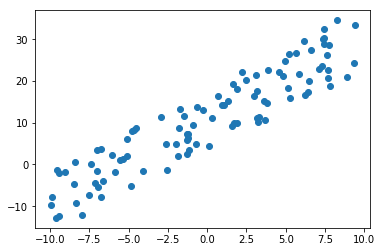

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.show()

# Stochastic Weights Averaging

[[10.89870937]
 [ 1.85374947]]
Mean squared error with normal weights: [20.23127096]
Mean squared error with averaged weights: [20.15206354]


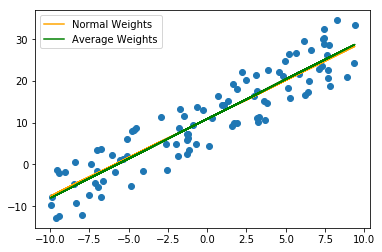

In [71]:
import time

n_epochs = 50
batch_size = 50
alpha1 = 0.0099
alpha2 = 0.0005
c = 5

theta = np.random.randn(2, 1)
plt.scatter(X, y)

thetaAvg = np.zeros((2, 1))
thetaAvg[0:2, 0:1] = theta

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        
        # Calculate rate
        t = 1 / c * ((epoch-1)%c + 1)
        alpha = (1-t)*alpha1 + t*alpha2
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Update weights
        theta = theta - alpha*gradient
        
        if epoch%c==0:
            
            n = epoch/c
            thetaAvg = (thetaAvg*n + theta) / (n+1)
        
plt.plot(X, X_b.dot(theta), color='orange', label='Normal Weights')
plt.plot(X, X_b.dot(thetaAvg), color='green', label='Average Weights')

plt.legend()
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error with normal weights:', error)
error = np.sum(((X_b.dot(thetaAvg) - y)**2), axis=0)/100
print('Mean squared error with averaged weights:', error)

# AMSGrad

[[10.25420385]
 [ 1.90383841]]
Mean squared error : [20.53173663]


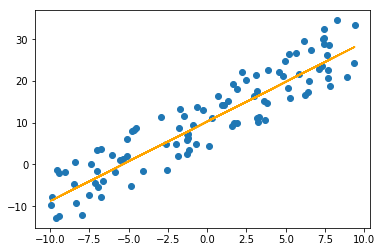

In [77]:
n_epochs = 200
batch_size = 50
eta = 0.001
rho1 = 0.9
rho2 = 0.999
r = 0
s = 0
t = 0
delta = 10**-7

theta = np.random.randn(2, 1)

plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Update time step
        t = t+1
        
        # Update biased first moment
        s = rho1*s + (1-rho1)*gradient
        
        # Update biased second moment
        if epoch==0 and i==0:
            r = rho2*r + (1-rho2)*np.multiply(gradient, gradient)        
        else:
            r = np.maximum(rho2*r + (1-rho2)*np.multiply(gradient, gradient), r)
        
        # Compute update
        del_theta = - eta * np.multiply(1/(delta + np.sqrt(r)), s)
        
        # Update Weights
        theta = theta + del_theta
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)

# NAdam

[[8.1340978 ]
 [1.89805824]]
Mean squared error : [27.64508396]


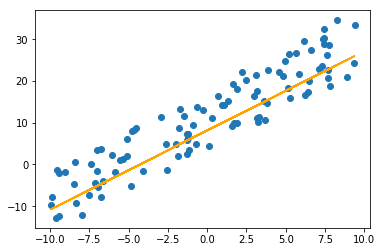

In [25]:
n_epochs = 50
batch_size = 50
eta = 0.001
rho1 = 0.9
rho2 = 0.999
r = 0
s = 0
t = 0
delta = 10**-7
alpha = 0.01

theta = np.random.randn(2, 1)
v = np.random.randn(2, 1)

plt.scatter(X, y)

for epoch in range(n_epochs):
    for i in range(m):
        
        # Sample Mini batch
        shuffle_index = np.random.permutation(m)
        xi = X_b[shuffle_index[:batch_size]]
        yi = y[shuffle_index[:batch_size]]
        
        # Apply interim update
        theta = theta + alpha*v
        
        # Compute Gradient
        gradient = (2* xi.T.dot(xi.dot(theta) - yi))/(batch_size)
        
        # Update time step
        t = t+1
        
        # Update biased first moment
        s = rho1*s + (1-rho1)*gradient
        
        # Update biased second moment
        r = rho2*r + (1-rho2)*np.multiply(gradient, gradient)
        
        # Correct bias in first moment
        s_hat = s / (1+rho1**t)
        
        # Correct bias in first moment
        r_hat = r / (1+rho2**t)
        
        # Compute update
        v = alpha*v - eta * np.multiply(1/(delta + np.sqrt(r_hat)), s_hat)
        
        # Update Weights
        theta = theta + v
        
plt.plot(X, X_b.dot(theta), color='orange')
print(theta)
error = np.sum(((X_b.dot(theta) - y)**2), axis=0)/100
print('Mean squared error :', error)